# Honey Production

As you may have already heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

## Check out the Data

In [57]:
df = pd.read_csv('honeyproduction.csv')

In [58]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [59]:
# We care about the total production of honey per year. We use the .groupby() to get the mean of totalprod per year.

prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [60]:
X = prod_per_year["year"]

In [61]:
X = X.values.reshape(-1, 1)

In [62]:
print(X)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


In [63]:
y = prod_per_year["totalprod"]

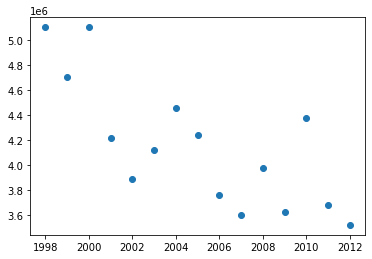

In [64]:
plt.scatter(X, y)
plt.show()

## Create and Fit a Linear Regression Model

In [65]:
regr = linear_model.LinearRegression()

In [66]:
regr.fit(X, y)

LinearRegression()

In [67]:
print(regr.coef_[0])

-88303.18915238194


In [68]:
regr.intercept_

181208083.1073298

In [69]:
y_predict = regr.predict(X)

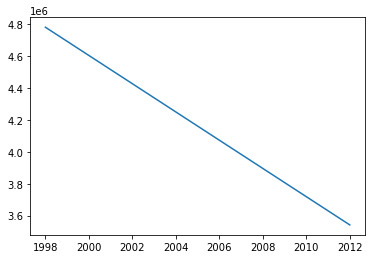

In [70]:
plt.plot(X, y_predict)
plt.show()

## Predict the Honey Decline

It looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

Our known dataset stops at the year 2013, so let’s create a NumPy array called X_future that is the range from 2013 to 2050

In [73]:
X_future = np.array(range(2013, 2051))

In [74]:
X_future = X_future.reshape(-1, 1)

In [75]:
future_predict = regr.predict(X_future)

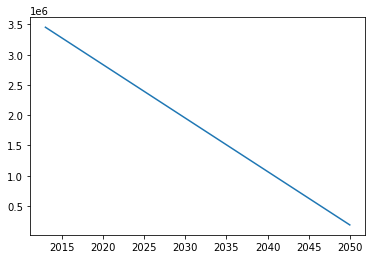

In [79]:
plt.plot(X_future, future_predict)
plt.show()